In [33]:
import fastf1 as ff1
import pandas as pd
import matplotlib.pyplot as plt
from fastf1 import plotting

In [34]:
# Enable the cache
ff1.Cache.enable_cache('cache/') 
# Get rid of an error
pd.options.mode.chained_assignment = None
plotting.setup_mpl()

In [35]:
session = ff1.get_session(2022, 'Silverstone', 'Q')
session.load()

core           INFO 	Loading data for British Grand Prix - Qualifying [v2.2.9]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tra

In [42]:
laps = session.laps
ver_lap = laps.pick_driver('VER').pick_fastest()
ham_lap = laps.pick_driver('SAI').pick_fastest()

In [43]:
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()

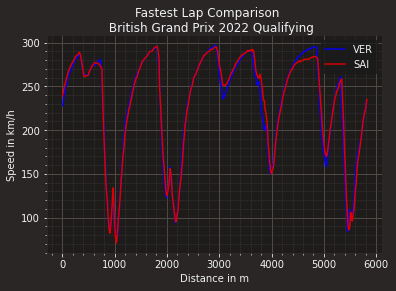

In [44]:
rbr_color = plotting.team_color('RBR')
mer_color = plotting.team_color('FER')

fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label='VER')
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label='SAI')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()